# Medical Insurance Costs

In [1]:
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Check for missing values and duplicates

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values found

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

Removed one duplicate

sns.pairplot(df)
plt.show()### Exploratory data analysis (EDA)

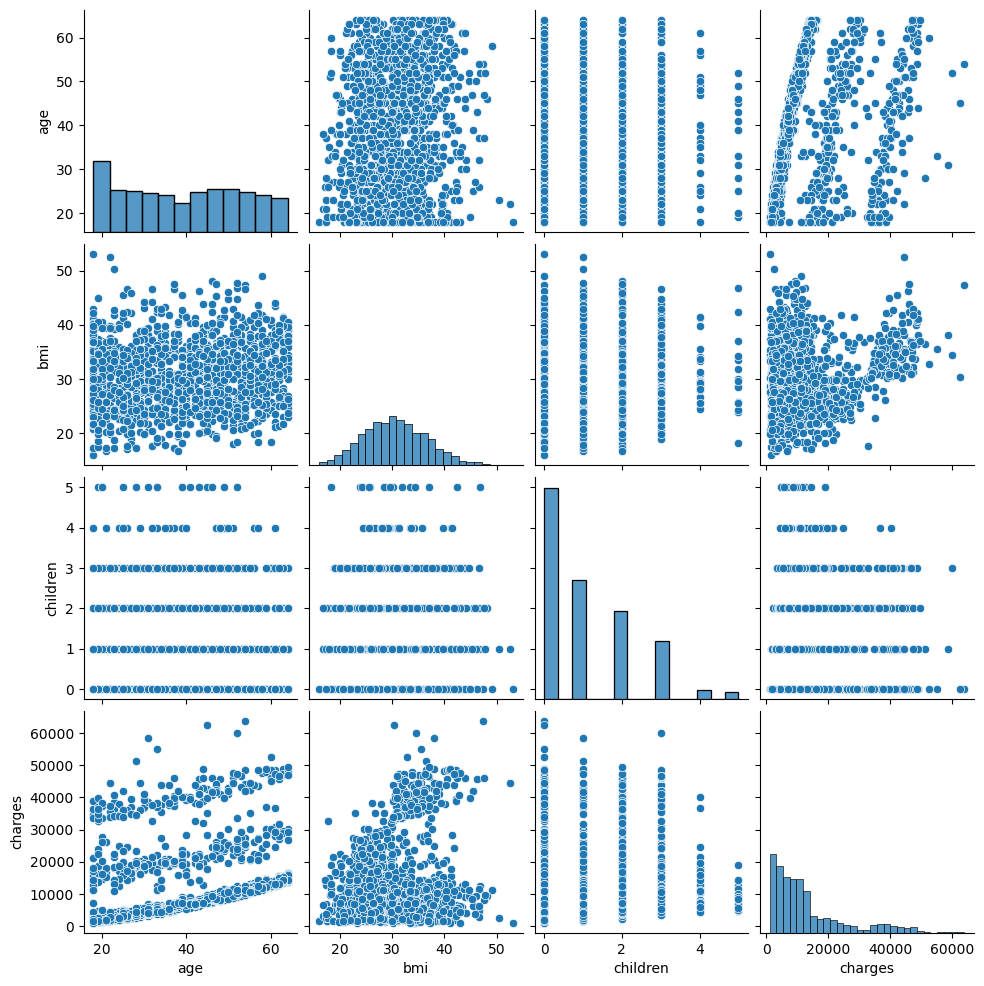

In [7]:
sns.pairplot(df)
plt.show()

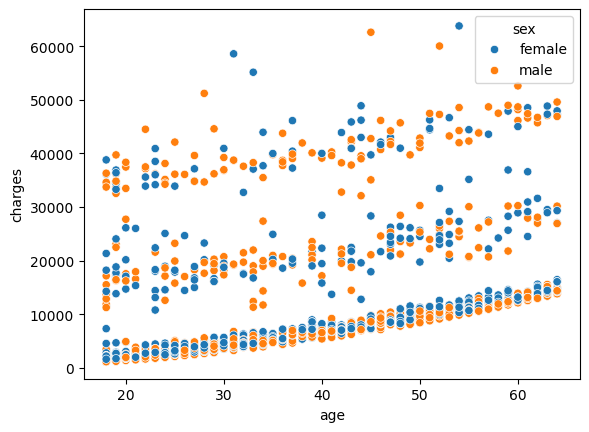

In [8]:
sns.scatterplot(data=df, x='age', y='charges', hue='sex')
plt.show()

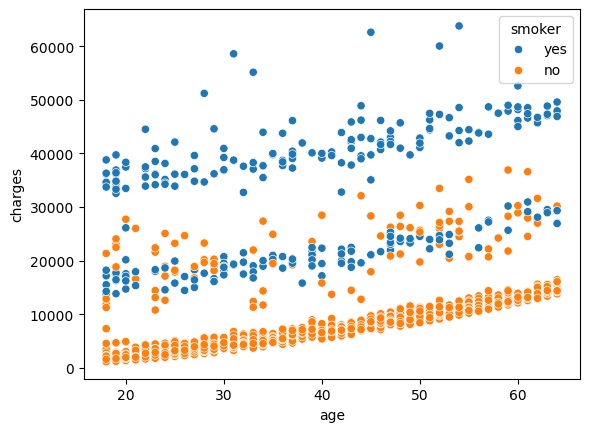

In [9]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.show()

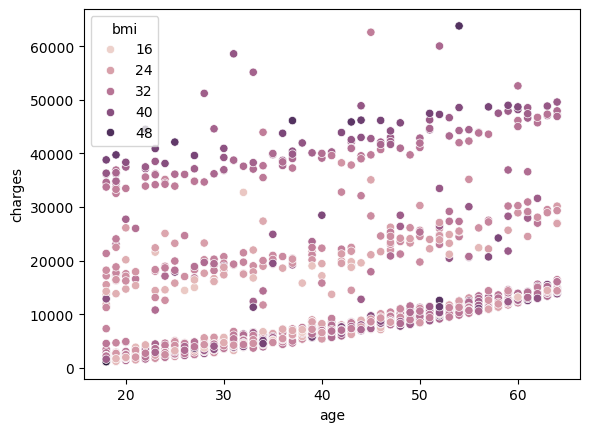

In [10]:
sns.scatterplot(data=df, x='age', y='charges', hue='bmi')
plt.show()

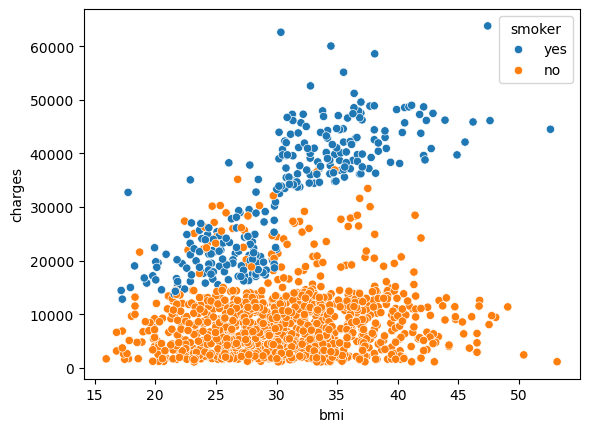

In [11]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.show()

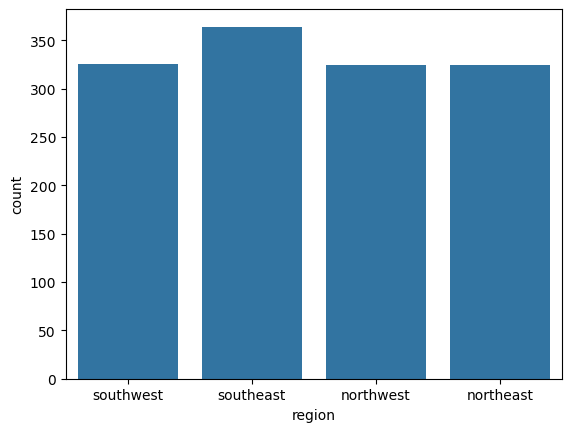

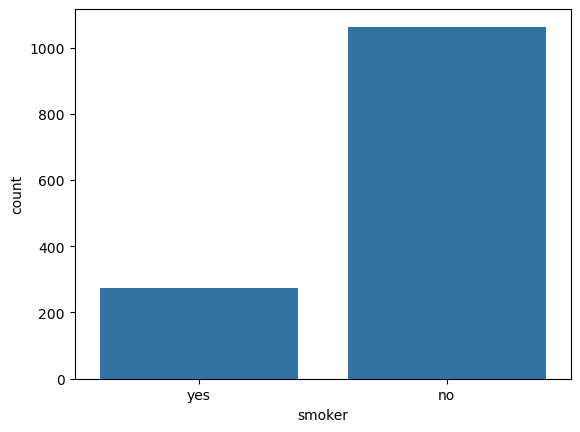

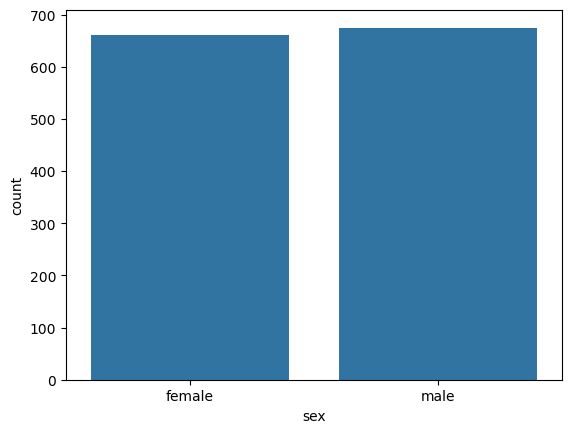

In [12]:
for i in ['region', 'smoker', 'sex']:  
  sns.countplot(df, x=i)
  plt.show()

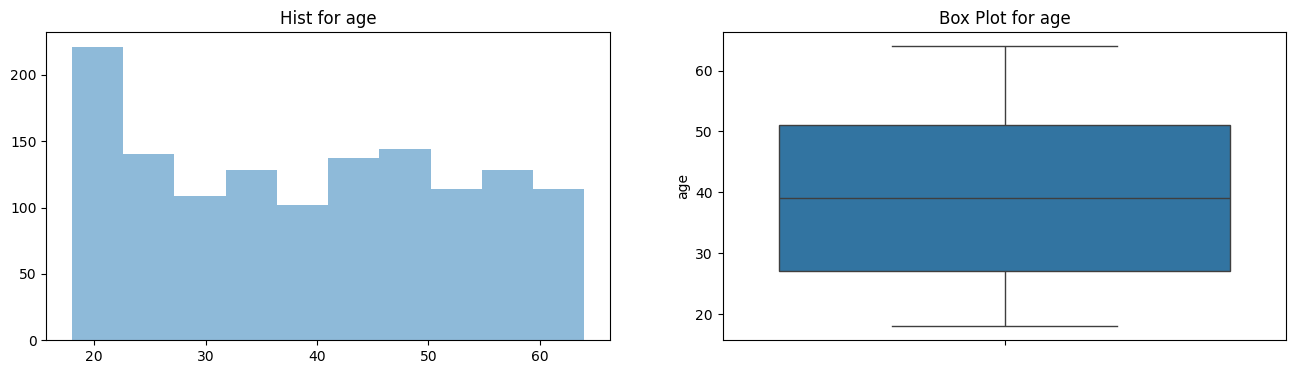

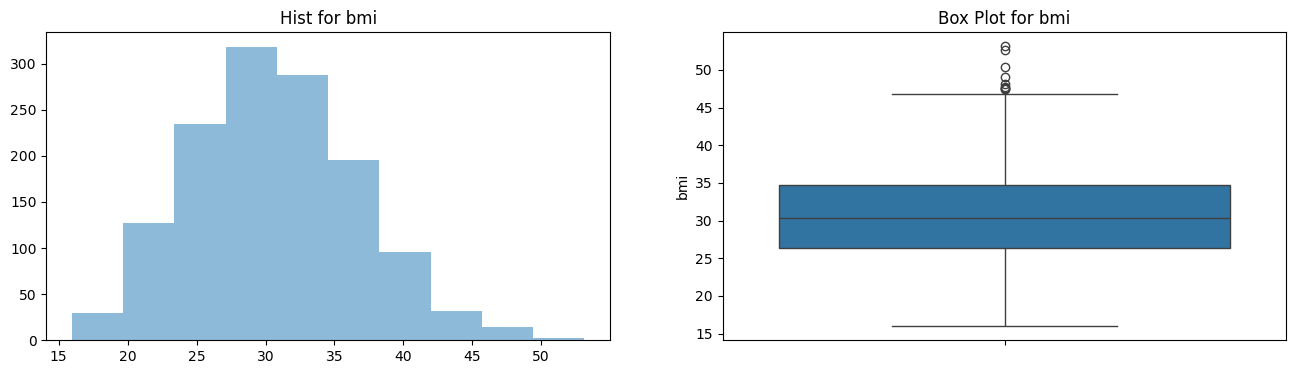

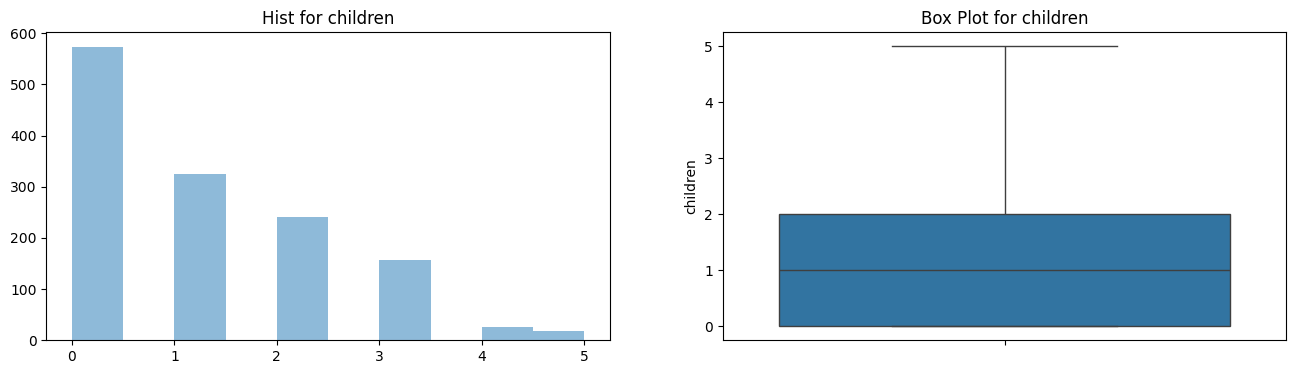

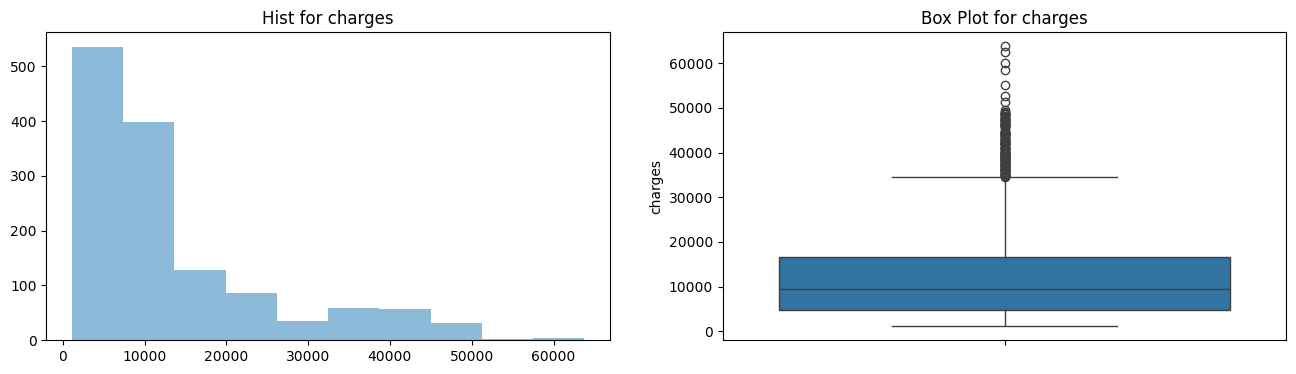

In [13]:
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(16, 4))
    plt.subplot(1,2,1)
    plt.title(f'Hist for {column}')
    plt.hist(df[column], alpha=0.5)
    plt.subplot(1,2,2)
    plt.title(f'Box Plot for {column}')
    sns.boxplot(df[column])
    plt.show()

### Handling categorical values

In [14]:
mdf = df.copy()

Label encoding for smoker and sex columns

In [15]:
mdf['smoker'] = mdf['smoker'].map({'no':0, 'yes':1})

mdf['sex'] = mdf['sex'].map({'female':0, 'male':1})

One hot encoding for region column

In [16]:
mdf = pd.get_dummies(mdf, columns=['region'])

In [17]:
mdf

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


### Training and evaluating model

In [18]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [19]:
from model.standard_scaler import StandardScaler
df_final = mdf.copy()

Y = df_final['charges'].values
X = df_final.drop(['charges'], axis=1).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Splitting the data for training

In [20]:
import numpy as np
from model.util import test_split

xtrain, xtest, ytrain, ytest = test_split(X_scaled, Y, test_size=0.2, random_state=42)

Training the model

In [21]:
from model.lin_regression import LinearRegression
model = LinearRegression() 

model.fit(xtrain, ytrain, epochs=1000, learn_rate=0.1)

test_predictions = model.predict(xtest)

Evaluating the model using the following metrics (MAE, R2, MSE, RMSE)

In [22]:
from model.metrics import calculate_mse, calculate_r2_score, calculate_mae

mse_test = calculate_mse(ytest, test_predictions)
mae_test = calculate_mae(ytest, test_predictions)
r2_test = calculate_r2_score(ytest, test_predictions)
    
print("Test MSE:", mse_test)
print("Test MAE:", mae_test)
print("Test R2 Score:", r2_test)

Test MSE: 34004935.82412183
Test MAE: 4111.953764798657
Test R2 Score: 0.7881079022348517


Exporting the model using Pickle

In [23]:
import pickle

pickle.dump(model, open('../model.pkl', 'wb'))
pickle.dump(scaler, open('../scaler.pkl', 'wb'))